# PS 3 Week 12: Hypothesis Testing
Author: Eric Van Dusen, Andrew Little, William McEachen

In [2]:
import numpy as np
from scipy import stats
from datascience import Table
import pandas as pd
from ipywidgets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Difference of Means: Comparing Samples

When we have a continuous variable categorized by a categorical variable, we can use a *difference of means* test to determine if there is a relationship between the categorical variable and the continuous variable. In the example below, we will determine if there is a relationship between party control majority and their governing time. In parliamentary systems, the party in control often is not the majority, just a plurality. When this happens, when the governing party is the minority, does it have shorter governing times? Let's find out!

Below, we load in a table called <code>govts_df</code> that has 4 columns: <code>nation</code>, <code>govttime</code>, the amount of time the government is in control, and <code>mingov</code>, a binary categorical variable where 1 signifies that the party was the minority. Let's load the table first:

In [ ]:
govts_df = pd.read_csv('govts.csv').drop('govtdate', axis=1)
govts_df

Now, let's plot the distributions of <code>govttime</code>, separated by <code>mingov</code>.

In [ ]:
sns.distplot(govts_df[govts_df.mingov==1]['govttime'], label='minority')
sns.distplot(govts_df[govts_df.mingov==0]['govttime'], label='majority')

What do you notice about the two distributions?

Let's look at the differences of means

In [ ]:
dom = np.mean(govts_df[govts_df.mingov==1]['govttime']) - np.mean(govts_df[govts_df.mingov==0]['govttime'])
dom

So, minority governments last on average 256 days less than majority goverments. But maybe this is just driven by random chance!

To explore this, we can first calculate the standard error for the difference of means. To use this formula, we need to know how many majority and minority governments there are:

In [ ]:
govts_df['mingov'].value_counts()

Now we can apply our formula from the slides:

In [ ]:
sd1 = np.std(govts_df[govts_df.mingov==1]['govttime'])
sd0 = np.std(govts_df[govts_df.mingov==0]['govttime'])
n1 = 124
n0=53
se_dom = np.sqrt((sd1**2)/n1 + (sd0**2)/n0)
se_dom

We can make some confidence intervals:

In [ ]:
print("[",dom - 1.96*se_dom,",",dom+1.96*se_dom,"]")

In [ ]:
print("[",dom - 2.58*se_dom,",",dom+2.58*se_dom,"]")

Our t statistic is then:

In [ ]:
dom/se_dom

Here is a manual computation of the p value, no need to follow the details here

In [ ]:
 stats.t.sf(np.abs(dom/se_dom), n0 + n1-2)*2

Since the p value is less than .01, we would say this difference is statistically significant at the 1% level. 

As a side-bar, here is the p-value we get for the example of D vs Rs saying gun policy is important. The first argument is the t value we computed, and the second is the degrees of freedom (don't worry about this)

In [ ]:
 stats.t.sf(2.2, 598)*2

Which is what I put in the slides.

#### Using Built-in functions
In order to compare the distributions of values by a categorical variable, create an array for the continuous variable for each of the values of the categorical variable. Because <code>mingov</code> has 2 values, we will create 2 arrays. We then use <code>stats.ttest_ind(categorical_value_1_array, categorical_value_2_array)</code>  

In [ ]:
minority_arr = govts_df[govts_df.mingov==1]['govttime']
majority_arr = govts_df[govts_df.mingov==0]['govttime']
stats.ttest_ind(minority_arr,majority_arr)

The default methods here are using some slightly different calculations than what we did above (in particular, for the standard error calculation), but the end result is effectively the same.

## Correlation
When both variables are continuous, we want to measure their *correlation*: the degree to which one of the variable's change in value coincides with a similar change in value in the other variable. In the following example, will look at the correlation between health care spending as a proportion of GDP and life expectancy in OECD countries.

First, we need to load in the data set from a CSV. Just to see another example of how to load data, this one is stored on my website.

In [3]:
healthspend = pd.read_csv("http://andrewtlittle.com/ps3data/outspend2015.csv")
healthspend

,Unnamed: 0,Country,Year,Expectancy,Spending
0,16,Australia,2015,84.5,9.321
1,33,Austria,2015,83.7,10.343
2,50,Belgium,2015,83.4,10.106
3,67,Canada,2015,83.9,10.377
4,83,Chile,2015,82.7,8.022
5,99,Czech Republic,2015,81.6,7.243
6,116,Denmark,2015,82.7,10.274
7,133,Estonia,2015,82.2,6.482
8,150,Finland,2015,84.4,9.743
9,167,France,2015,85.5,11.501


One way to make a scatter plot is with the `.scatterplot` function in the seaborn library. The first argument is our x axis variable, the second is the y axis variable, and the third tells us that both of these are in our `healthspend` data frame.

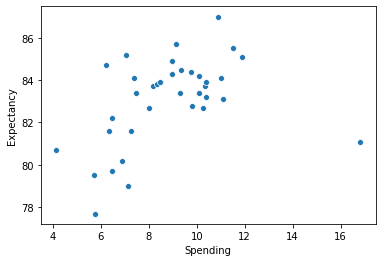

In [4]:
sns.scatterplot('Spending', 'Expectancy', data=healthspend)

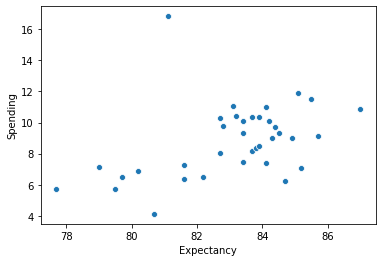

In [5]:
sns.scatterplot('Expectancy','Spending', data=healthspend)

To get a sense of which "quadrant" each country is in, we can make a vertical line at the average spending and a horizontal line at the average life expectancy.

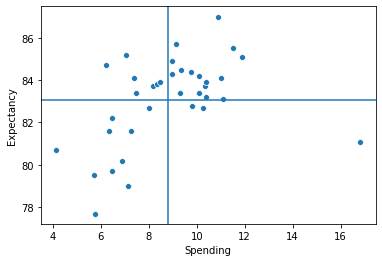

In [6]:
sns.scatterplot('Spending', 'Expectancy', data=healthspend)
plt.axvline(np.mean(healthspend['Spending']))
plt.axhline(np.mean(healthspend['Expectancy']))

To calculate the correlation and do a hypothesis test we can use the `.pearsonr` function in the stats library. This function returns the correlation, and then the p value from a hypothesis test where the null is that $r=0$.

In [7]:
stats.pearsonr(healthspend['Spending'], healthspend['Expectancy'])

(0.42008562489192186, 0.010747636192180597)

The correlation is postive at .42, and the p-value is $.011$. SO, this is statistically significant at the 95% level (but not the 99% level!)

#### Using Python
To caculate the correlation coefficient in Python, we use <code>stats.pearsonr(X,Y)</code>. This returns the r value, and the p-value representing the likelihood that the coinciding r value could have occurred by random. Below, we calculate the correlation coefficient for GDP and incumbent vote share:

In [ ]:
stats.pearsonr(fair_df.GROWTH, fair_df.VOTE)

### [OPTIONAL] Interactive Visual
Below, we visualize two distributions and calculate the difference of means statistic and p-value for the likelihood that the two distributions are truly different.

In [ ]:
def cloud(covariance):
    X,Y = list(zip(*np.random.multivariate_normal([5,5], [[1,covariance],[covariance,1]], size=1000).tolist()))
    sns.scatterplot(X, Y)
    print("correlation coefficient:",stats.pearsonr(X,Y)[0])

interact(cloud, covariance=(-1.0,1.0), continuous_update=False)

### [OPTIONAL] Tabular Analysis  
In the following example, we will explore how to determine if there is a relationship between two categorical variables. Given a table of how many people voted for the 2012 presidential candidate, can we establish a connection between gender and political affiliation?

Suppose we know that 49.2% of the sample voted for Obama and 50.8% voted for Romney, regardless of gender. The table represents the values we should expect given the total number of people. 

In [ ]:
expected_table = Table().with_columns(
                'Politican',['Obama', 'Romney', 'Column Total'],
                'Male', ['0.492*374=184', '0.507*374=190', 374],
                'Female', ['0.492*437=215', '0.508*437=222', 437],
                'Row Total', [399, 412, 811]
                )
expected_table

If there is no relationship between gender and voting decisions, the number of voters in each cell should be proportional to the overall frequency of that politician and the overall number of people of that gender. Because we know the total number of men and women that voted, we set the expected value for each gender/politician cell to that politician's frequency (49.2% or 50.8%) multiplied by the total number of the gender (374 or 437).

Now that we have the expected values, let's check the real results:

In [ ]:
respond_table = Table().with_columns(
                'Politican',['Obama', 'Romney', 'Column Total'],
                'Male', [170, 204, 374],
                'Female', [229, 208, 437],
                'Row Total', ['49%', '51%', '100%']
                )
respond_table

How does this compare to the expected results?

In [ ]:
compare_table = Table().with_columns(
                'Politican',['Obama', 'Romney'],
                'Male', ['Expected: 184 Actual: 170', 'Expected: 190 Actual: 204'],
                'Female', ['Expected: 215 Actual: 229', 'Expected: 222 Actual: 208']
                )
compare_table

*Review*: What differences do you see between the expected and reported values?  


Given the expected and actual results, we can compute the *chi square* statistic for this table. The chi square statistic is the measure used for the significance of categorical varibales (in this case voting record and gender). It is calculated by taking the the sum difference between the observed values and the expected values squared, divided by the expected value.
$$ \chi^2 = \sum \frac{(O-E)^2}{E}$$.

For the election and gender case, this reduces to the following:
$$\frac{(170-184)^2}{184}+\frac{(229-215)^2}{215}+\frac{(204-190)^2}{190}+\frac{(208-222)^2}{222}=3.892$$

Using a textbook appendix (or online tables), we can determine that the difference achieves a p-value under .05, making the relationship between gender and voting behavior statistically significant for this sample.

#### Using Python
To automatically run a chi-squared test in python, create lists of the expected values and of the observed values, and run the following:  
<code> stats.chisquare(observed_array, f_exp=epected_array)  </code>

This will return the $\chi^2$ statistic and the associated p-value. Below, we perform the calculation for the gender/vote relationship.

NOTE: This command returns a Power_divergenceResult. This holds the statistic and p-value for the data.

In [ ]:
#NOTE: The expected_table above uses strings, but we need numbers for the computation to be successful. 
#The new expected_table is the original expected_table's numeric values.

expected_table = Table().with_columns(
                'Politican',['Obama', 'Romney', 'Column Total'],
                'Male', [184, 190, 374],
                'Female', [215, 222, 437],
                'Row Total', [399, 412, 811]
                )
expected = np.append(expected_table.column('Male')[:2], expected_table.column('Female')[:2])
reported = np.append(respond_table.column('Male')[:2], respond_table.column('Female')[:2])
stats.chisquare(reported, f_exp=expected, ddof=1)

As we can see, we achieve a p-value of .0485, just below the .05 threshold. Therefore, the relationship is statistically significant.